In [1]:
import sys
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 24,
     'font.family': 'sans-serif',
     'legend.fontsize': 24,
     'axes.labelsize': 24,
     'axes.labelpad': 10,
     'xtick.labelsize': 22,
     'ytick.labelsize': 22 
    }
    )

mpl.rcParams

['/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-50a33/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/srv/dask/lib', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/lib-dynload', '/eos/user/m/malvesga/.local/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.12-9a1bc/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_105a_swan/x86_64-centos7-gcc11-op

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [2]:
from processing import lumi_periods_2017, lumi_periods_2018

# lepton_type = 'muon'
lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

save_figures = False

{'muon': {'2017B': 4.799881474, '2017C1': 5.785813941, '2017C2': 3.786684323, '2017D': 4.247682053, '2017E': 9.312832062, '2017F1': 1.738905587, '2017F2': 8.125575961, '2017F3': 3.674404546}, 'electron': {'2017B': 4.594096155565198, '2017C1': 5.521298099245362, '2017C2': 3.6135646891210857, '2017D': 4.0518639103567, '2017E': 8.906848461089172, '2017F1': 1.6584516422062712, '2017F2': 7.749629938012412, '2017F3': 3.504400870870218}}
Luminosity 2017 muon: 41.471779946999995
Luminosity 2017 electron: 39.60015376646642
{'muon': {'2018A': 12.103512482, '2018B1': 6.3798061, '2018B2': 0.40141386, '2018C': 6.524227381, '2018D1': 19.877577, '2018D2': 10.414449}, 'electron': {'2018A': 12.103189833, '2018B1': 6.379806, '2018B2': 0.40141386, '2018C': 6.527251329, '2018D1': 19.876804, '2018D2': 10.414449}}
Luminosity 2018 muon: 55.700985822999996
Luminosity 2018 electron: 55.702914022


### Event selection

In [3]:
def select_events( df_events, lepton_type, max_num_tracks = -1, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )

    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )
    
    msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
                         ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )
    
    msk_tau21_       = ( jet0_tau21_ <= 0.60 )
    
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )

#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )    
    msk_extra_tracks_ = None
    if max_num_tracks_ >= 0:
        msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
    else:
        msk_extra_tracks_ = np.full( df_events.shape[0], True, dtype=bool )
    
    masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
               msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
                        "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Data (non-proton)

In [4]:
labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ ]
        fileNames_data = {
            
        }
    elif lepton_type == 'electron':
        labels_data = [ ]
        fileNames_data = {
            
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output_events'
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

df_counts_data = None
df_events_data = None

df_counts_data_list_ = []
df_events_data_list_ = []
for label__ in labels_data:
    print ( label__ )
    file_path_ = fileNames_data[ label__ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
        df_events_data__ = store_[ "events" ]
        df_counts_data_list_.append( df_counts_data__ )
        df_events_data_list_.append( df_events_data__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

df_events_data = pd.concat( df_events_data_list_ )

{'data-2018-electron-2018A': 'output_events/data-store-data-2018-electron-2018A.h5', 'data-2018-electron-2018B': 'output_events/data-store-data-2018-electron-2018B.h5', 'data-2018-electron-2018C': 'output_events/data-store-data-2018-electron-2018C.h5', 'data-2018-electron-2018D': 'output_events/data-store-data-2018-electron-2018D.h5'}
data-2018-electron-2018A
output_events/data-store-data-2018-electron-2018A.h5
['/counts', '/events']
data-2018-electron-2018B
output_events/data-store-data-2018-electron-2018B.h5
['/counts', '/events']
data-2018-electron-2018C
output_events/data-store-data-2018-electron-2018C.h5
['/counts', '/events']
data-2018-electron-2018D
output_events/data-store-data-2018-electron-2018D.h5
['/counts', '/events']


In [5]:
df_counts_data

All           2086971
Jet           2086971
Electron      2034017
check_none    2034017
dtype: int64

In [6]:
df_events_data

,run,lumiblock,event,crossingAngle,betaStar,instLumi,jet0_pt,jet0_eta,jet0_phi,jet0_energy,...,WLeptonicPy_nom,WLeptonicPz_nom,WLeptonicE_nom,WLeptonicM_nom,WW_energy_nom,WW_pz_nom,MWW_nom,YWW_nom,xiCMS_45_nom,xiCMS_56_nom
0,315322,1188,715318336,140.0,0.3,4.633018,214.278488,1.419358,-1.648903,473.899902,...,250.947968,-18.118492,265.790192,80.379967,739.690063,398.931335,620.040466,0.603199,0.086243,0.024868
1,315361,546,454140864,150.0,0.3,7.586127,210.163864,-1.872843,2.221650,702.024109,...,-117.814156,-38.194698,149.213669,80.380005,851.237793,-705.789124,461.346558,-1.185355,0.009217,0.117800
2,315361,546,454245536,150.0,0.3,7.586127,224.082245,-1.913470,2.076695,779.045166,...,-148.144974,-230.780090,294.747314,80.379906,1073.792480,-973.500000,449.121796,-1.508091,0.006605,0.156374
3,315361,546,454610976,150.0,0.3,7.586127,230.079666,-1.842740,2.224065,746.500854,...,-46.845894,-66.269569,173.695770,145.326202,920.196655,-774.389404,469.562897,-1.226454,0.005023,0.124160
4,315361,546,454284384,150.0,0.3,7.586127,236.852982,1.349874,1.890733,494.408386,...,-195.979355,-308.503998,394.749817,131.782547,889.158203,117.554810,880.868347,0.132988,0.075164,0.057078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127560,325099,63,119220184,154.0,0.3,17.444916,279.716736,-1.151989,1.381430,495.116272,...,-20.308756,10.967786,145.022552,81.304024,640.138794,-387.415222,436.707367,-0.701320,0.016881,0.076483
127561,325099,63,117917440,154.0,0.3,17.444916,530.528381,-0.551536,2.884574,629.308533,...,-178.416916,-570.733154,760.391357,80.380348,1389.699951,-878.400391,1074.825195,-0.744871,0.037770,0.172909
127562,325099,63,117911328,154.0,0.3,17.444916,239.311798,-0.328252,1.782844,269.267120,...,-97.177170,82.097290,158.189331,80.380020,427.456451,2.124435,404.974945,0.004970,0.030053,0.029726
127563,325099,63,117855560,154.0,0.3,17.444916,208.144272,1.000547,0.111005,330.738281,...,-12.786016,334.435577,490.622345,305.726227,821.360596,579.222717,581.946350,0.877568,0.098789,0.009678


### Data (protons)

In [7]:
labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ "data-single-arm" ]
        fileNames_data = {
            "data-single-arm": "data-store-data-single-arm.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [ "data-single-arm-electron" ]
        fileNames_data = {
            "data-single-arm-electron": "data-store-data-single-arm-electron.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output-final'
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

# df_counts_data = None
# # df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_data = store_[ "counts" ]
# #     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_protons_multiRP_counts_data = None
# df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None

df_protons_multiRP_counts_data_list_ = []
# df_protons_multiRP_data_index_list_ = []
df_protons_multiRP_data_events_list_ = []
for label_ in labels_data:
    print ( label_ )
    file_path_ = fileNames_data[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
#         df_protons_multiRP_data_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events__ = store_[ "events_multiRP" ]
        df_protons_multiRP_counts_data_list_.append( df_counts_data__ )
#         df_protons_multiRP_data_index_list_.append( df_protons_multiRP_data_index__ )
        df_protons_multiRP_data_events_list_.append( df_protons_multiRP_data_events__ )

df_protons_multiRP_counts_data = df_protons_multiRP_counts_data_list_[0]
for idx_ in range( 1, len( df_protons_multiRP_counts_data_list_ ) ):
    df_protons_multiRP_counts_data = df_protons_multiRP_counts_data.add( df_protons_multiRP_counts_data_list_[ idx_ ] )

# df_protons_multiRP_data_index = pd.concat( df_protons_multiRP_data_index_list_ )
df_protons_multiRP_data_events = pd.concat( df_protons_multiRP_data_events_list_ )

{'data-2018-electron-2018A': 'output-final/data-store-data-2018-electron-2018A.h5', 'data-2018-electron-2018B': 'output-final/data-store-data-2018-electron-2018B.h5', 'data-2018-electron-2018C': 'output-final/data-store-data-2018-electron-2018C.h5', 'data-2018-electron-2018D': 'output-final/data-store-data-2018-electron-2018D.h5'}
data-2018-electron-2018A
output-final/data-store-data-2018-electron-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018B
output-final/data-store-data-2018-electron-2018B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018C
output-final/data-store-data-2018-electron-2018C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-electron-2018D
output-final/data-store-data-2018-electron-2018D.h5
['/counts', '/events_multiRP', '/protons_multiRP']


In [8]:
df_protons_multiRP_counts_data

All                  2086971
Jet                  2086971
Electron             2034017
Proton_check_none    2034017
Proton               1473745
dtype: int64

In [9]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event     slice                                       
315361 546       454245536 0              150.0       0.3   7.586127   
                 454284384 0              150.0       0.3   7.586127   
315689 934       958763264 0              138.0       0.3  10.403095   
                 958598592 0              138.0       0.3  10.403095   
                 958780288 0              138.0       0.3  10.403095   
...                                         ...       ...        ...   
325099 47        89164376  0              155.0       0.3  17.612989   
                 88318960  0              155.0       0.3  17.612989   
                 88388800  0              155.0       0.3  17.612989   
       63        118962904 0              154.0       0.3  17.444916   
                 119220184 0              154.0       0.3  17.444916   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
315361 546       454245536 0      224.082245 -1.913470  2.076695   779.045166   
                 454284384 0      236.852982  1.349874  1.890733   494.408386   
315689 934       958763264 0      207.366104 -0.137139  2.412749   213.578995   
                 958598592 0      233.874451 -1.631122  0.305712   622.457275   
                 958780288 0      230.368988  2.155305 -2.417132  1008.757202   
...                                      ...       ...       ...          ...   
325099 47        89164376  0      213.958633 -0.458883  2.204481   243.765945   
                 88318960  0      268.384583  0.393399  2.763410   305.293701   
                 88388800  0      223.603912 -0.099612  2.188183   233.202728   
       63        118962904 0      217.010239 -0.445125  2.536467   252.325989   
                 119220184 0      279.716736 -1.151989  1.381430   495.116272   

                                  jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                       ...   
315361 546       454245536 0      51.458626      58.253654   0.203878  ...   
                 454284384 0      40.106876      46.073044   0.262300  ...   
315689 934       958763264 0       9.711736      10.556401   0.105084  ...   
                 958598592 0      14.647236      16.221474   0.165934  ...   
                 958780288 0       5.724288       6.363680   0.119801  ...   
...                                     ...            ...        ...  ...   
325099 47        89164376  0      17.548851      19.204144   0.172859  ...   
                 88318960  0      83.643021      91.193466   0.377926  ...   
                 88388800  0      30.731178      33.621452   0.235766  ...   
       63        118962904 0      66.223526      72.479942   0.266065  ...   
                 119220184 0      30.944349      35.452206   0.295951  ...   

                                           MX        YX   diffMWW_MX  \
run    lumiblock event     slice                                       
315361 546       454245536 0       460.040711  0.000227   -17.936707   
                 454284384 0      1464.844979 -0.093295  -532.410592   
315689 934       958763264 0      1219.615616 -0.104743  -729.470169   
                 958598592 0      1681.307361 -0.323156 -1090.894885   
                 958780288 0       707.727738 -0.529493   -89.674027   
...                                       ...       ...          ...   
325099 47        89164376  0      1464.380644 -0.030910  -869.568755   
                 88318960  0       974.384218  0.214643  -389.459414   
                 88388800  0      1155.513063 -0.329946  -687.239046   
       63        118962904 0      1614.271574 -0.192409 -1166.779691   
                 119220184 0      1981.036529 -0.108370 -1542.024688   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lum

### Select events (non-proton)
#### Without track multiplicity selection

In [10]:
df_events_data__, selection_keys_, selections_ = select_events( df_events_data, lepton_type, max_num_tracks = -1 )
df_events_data = df_events_data__
print ( df_events_data.shape[0] )
print ( selection_keys_ )
print ( selections_ )

70253
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 2034017, 'Electron': 2033063, 'Jet': 1456891, 'Jet_Electron': 1440092, 'MET': 1021359, 'Jet_MET': 893969, 'PrunedMass': 243333, 'Tau21': 161536, 'BJet_Veto': 131888, 'Xi_CMS': 113271, 'WLeptonic': 75974, 'Jet_WLeptonic': 74191, 'MWW': 70253, 'ExtraTracks': 70253}


In [11]:
df_events_data

,run,lumiblock,event,crossingAngle,betaStar,instLumi,jet0_pt,jet0_eta,jet0_phi,jet0_energy,...,WLeptonicPy_nom,WLeptonicPz_nom,WLeptonicE_nom,WLeptonicM_nom,WW_energy_nom,WW_pz_nom,MWW_nom,YWW_nom,xiCMS_45_nom,xiCMS_56_nom
171,315420,1133,726864128,140.0,0.3,5.453134,267.507050,-0.602743,-0.276761,328.727966,...,132.688583,801.807678,856.979370,80.379181,1185.707275,630.627747,1002.323853,0.592732,0.138571,0.041551
182,315420,1154,736915264,140.0,0.3,5.443888,306.193176,-1.188701,2.753277,557.364502,...,-134.132812,-19.938583,224.718063,80.379944,782.082581,-475.890686,607.997070,-0.706523,0.021783,0.094997
221,315366,541,295625984,140.0,0.3,5.282880,224.168152,1.504784,-1.028455,535.752197,...,150.505219,-346.975769,412.522797,80.380104,948.275024,132.868988,937.582886,0.141044,0.082085,0.061644
224,315366,550,300058048,130.0,0.3,5.384124,271.030701,-0.481320,-1.542237,319.178467,...,270.916840,12.955200,283.533478,80.379951,602.711914,-122.593048,590.002136,-0.206279,0.034796,0.053656
232,315366,608,328236224,130.0,0.3,5.286835,249.424713,-1.039495,-2.600786,405.054077,...,119.066635,-239.913086,352.994934,80.380127,758.049011,-548.471008,523.190186,-0.915013,0.014770,0.099150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127461,325099,36,67709840,155.0,0.3,17.800211,231.531235,-0.754356,-0.043289,310.881653,...,111.491119,16.257786,319.804535,80.380058,630.686157,-175.441818,594.508911,-0.285704,0.033438,0.060429
127487,325099,46,87454184,155.0,0.3,17.623703,490.725281,-0.400161,1.272072,537.516479,...,-324.159882,-147.664444,418.448273,80.379723,955.964722,-349.316589,875.945251,-0.383112,0.045529,0.099270
127502,325099,48,91174296,155.0,0.3,17.599468,242.424088,-0.490797,-0.494865,283.667236,...,90.985161,-179.988007,310.733002,80.380043,594.400269,-303.803711,510.246643,-0.564231,0.020659,0.067398
127526,325099,64,120829104,154.0,0.3,17.430910,293.235504,-0.520755,1.476630,346.123871,...,-244.814957,-92.770073,279.122345,80.380096,625.246216,-252.469940,569.453247,-0.428172,0.026825,0.065667


### Select events (protons)
#### Without track multiplicity selection

In [12]:
df_protons_multiRP_data_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type, max_num_tracks = -1 )
df_protons_multiRP_data_events = df_protons_multiRP_data_events__
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

14108
['All', 'Electron', 'Jet', 'Jet_Electron', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 409787, 'Electron': 409578, 'Jet': 293597, 'Jet_Electron': 290154, 'MET': 206408, 'Jet_MET': 180130, 'PrunedMass': 49707, 'Tau21': 31914, 'BJet_Veto': 26292, 'Xi_CMS': 22656, 'WLeptonic': 15262, 'Jet_WLeptonic': 14914, 'MWW': 14108, 'ExtraTracks': 14108}


In [13]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event     slice                                       
315420 1133      726864128 0              140.0       0.3   5.453134   
       894       607660352 0              140.0       0.3   6.274613   
316590 431       585782912 0              145.0       0.3  14.426202   
315557 3         3539257   0              150.0       0.3  14.131405   
315322 1163      703840896 0              140.0       0.3   4.698878   
...                                         ...       ...        ...   
325057 166       233898736 0              154.0       0.3  16.653351   
       171       242674208 0              154.0       0.3  16.608753   
       201       301601216 0              153.0       0.3  16.292664   
325099 33        63071908  0              155.0       0.3  17.820852   
       64        121459728 0              154.0       0.3  17.430910   

                                     jet0_pt  jet0_eta  jet0_phi  jet0_energy  \
run    lumiblock event     slice                                                
315420 1133      726864128 0      267.507050 -0.602743 -0.276761   328.727966   
       894       607660352 0      258.122955 -0.151701 -0.278464   281.889465   
316590 431       585782912 0      289.656189  0.747139 -0.099794   384.605988   
315557 3         3539257   0      320.455597  0.162921  0.252521   347.784851   
315322 1163      703840896 0      221.096848 -0.750191  0.670560   302.272461   
...                                      ...       ...       ...          ...   
325057 166       233898736 0      391.919220 -0.288253 -1.681685   422.000427   
       171       242674208 0      258.054443  0.826060  2.375797   365.828156   
       201       301601216 0      254.922836  0.198860 -1.613786   272.686096   
325099 33        63071908  0      262.649292  0.129589  2.297641   282.011383   
       64        121459728 0      224.188904 -1.718547 -2.020800   653.207764   

                                   jet0_mass  jet0_corrmass  jet0_tau1  ...  \
run    lumiblock event     slice                                        ...   
315420 1133      726864128 0       69.924644      75.452583   0.224015  ...   
       894       607660352 0       99.471184     108.158211   0.372633  ...   
316590 431       585782912 0       54.921715      59.415188   0.301872  ...   
315557 3         3539257   0      101.192963     109.716438   0.399435  ...   
315322 1163      703840896 0       80.691124      87.766632   0.454904  ...   
...                                      ...            ...        ...  ...   
325057 166       233898736 0       74.646637      81.343063   0.233085  ...   
       171       242674208 0       85.260277      93.221931   0.343124  ...   
       201       301601216 0       62.171139      67.903496   0.280201  ...   
325099 33        63071908  0       74.196747      81.024986   0.322815  ...   
       64        121459728 0       89.113594      99.122002   0.445128  ...   

                                           MX        YX  diffMWW_MX  \
run    lumiblock event     slice                                      
315420 1133      726864128 0      1001.884788  0.210287   14.638222   
       894       607660352 0       967.723131 -0.150952 -278.344530   
316590 431       585782912 0       560.163230 -0.417477  -10.728781   
315557 3         3539257   0      1259.461746 -0.353747 -453.876296   
315322 1163      703840896 0      1216.309384  0.070613 -602.134823   
...                                       ...       ...         ...   
325057 166       233898736 0       783.414695 -0.351177   61.049172   
       171       242674208 0       638.552126 -0.337849 -117.704347   
       201       301601216 0      1494.870141 -0.265033 -833.363977   
325099 33        63071908  0      1334.799677 -0.246647 -608.869013   
       64        121459728 0      1016.374871 -0.589857 -360.900933   

                                  ratioMWW_MX  shiftedRatioMWW_MX  diffYWW_YX  \
run    lum

### Remove proton-tagged events from data event sample

In [14]:
index_vars_ = ['run', 'lumiblock', 'event' ]
df_events_data = df_events_data.set_index( index_vars_ )
df_protons_multiRP_data_events = df_protons_multiRP_data_events.reset_index().set_index( index_vars_ )

In [15]:
df_events_data.index

MultiIndex([(315420, 1133, 726864128),
            (315420, 1154, 736915264),
            (315366,  541, 295625984),
            (315366,  550, 300058048),
            (315366,  608, 328236224),
            (315366,  547, 298816672),
            (315366,  538, 294645056),
            (315420, 1078, 700884224),
            (315420, 1073, 698190336),
            (315366,  569, 309317536),
            ...
            (325057,  202, 304035680),
            (325099,   35,  65640352),
            (325099,   35,  65857560),
            (325099,   33,  62075488),
            (325099,   33,  63071908),
            (325099,   36,  67709840),
            (325099,   46,  87454184),
            (325099,   48,  91174296),
            (325099,   64, 120829104),
            (325099,   64, 121459728)],
           names=['run', 'lumiblock', 'event'], length=70253)

In [16]:
df_events_data = df_events_data.drop( index=df_protons_multiRP_data_events.index )

In [18]:
# df_events_data[]

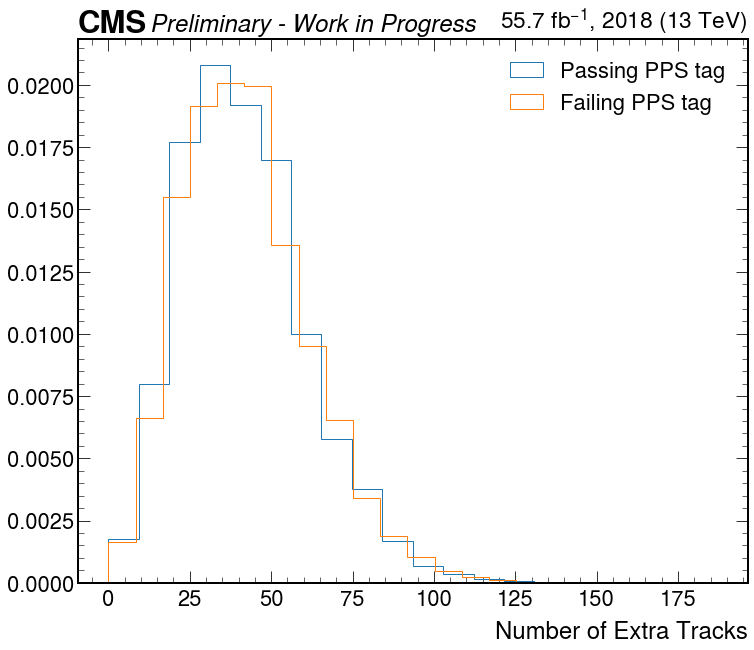

In [19]:
fig = plt.figure( figsize=(12,10) )
plt.hist( df_protons_multiRP_data_events['pfcand_nextracks'], histtype='step', density=True, bins=20, label='Passing PPS tag' )
plt.hist( df_events_data['pfcand_nextracks'], histtype='step', density=True, bins=20, label='Failing PPS tag' )
mplhep.cms.label('Preliminary - Work in Progress', data=True, lumi=55.7, year=2018, loc=0, fontsize=24)
plt.legend( loc='best', fontsize=22 )
plt.xlabel( r'Number of Extra Tracks' )
# plt.ylabel( 'Events' )
plt.savefig( "plots/passing_failling_double_tag.pdf", bbox_inches='tight' )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


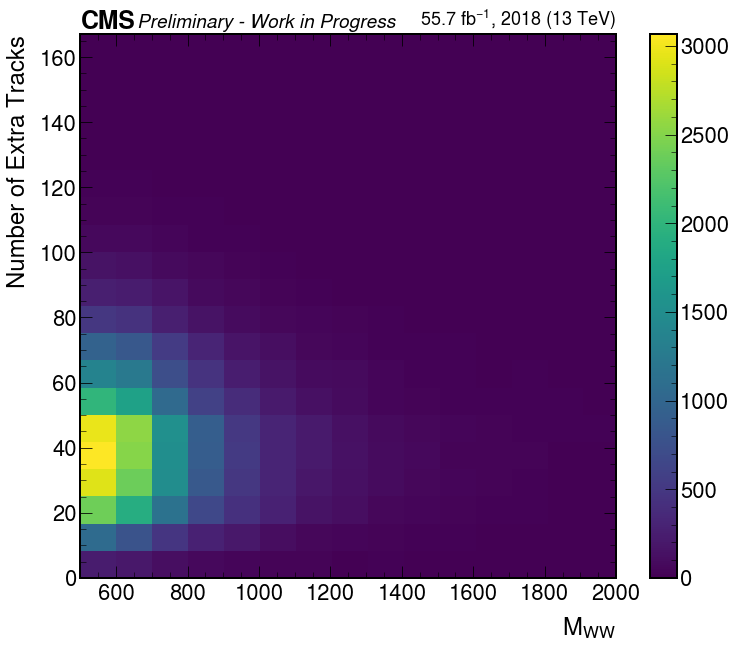

In [20]:
fig = plt.figure( figsize=(12,10) )
# plt.hist( df_protons_multiRP_data_events['pfcand_nextracks'], histtype='step', density=True, bins=20, label='Passing PPS tag' )
h,_, _, image = plt.hist2d( df_events_data['MWW_nom'], df_events_data['pfcand_nextracks'], density=False, bins=20 )
mplhep.cms.label('Preliminary - Work in Progress', data=True, lumi=55.7, year=2018, loc=0, fontsize=19)
plt.colorbar(image)
plt.legend( loc='best', fontsize=22 )
plt.xlim(500,2000)
plt.xlabel( r'$M_{WW}$' )
plt.ylabel( r'Number of Extra Tracks' )
plt.savefig( "plots/next_vs_MWW.pdf", bbox_inches='tight' )

### Track multiplicity selection

In [21]:
# df_events_data__, selection_keys_, selections_ = select_events( df_events_data, lepton_type, max_num_tracks = 4 )
# df_events_data_nTracks_4 = df_events_data__
# print ( df_events_data_nTracks_4.shape[0] )
# print ( selection_keys_ )
# print ( selections_ )

df_events_data_nTracks_4 = df_events_data.loc[ ( df_events_data.loc[ :, "pfcand_nextracks" ] <= 4 ) ]

In [22]:
df_events_data_nTracks_4

crossingAngle  betaStar   instLumi     jet0_pt  \
run    lumiblock event                                                        
316199 804       1101164416          142.0      0.30  13.337929  443.588226   
315770 231       315826304           149.0      0.30  18.309088  273.536469   
316187 1757      2444419072          130.0      0.30   7.092372  231.313370   
316590 314       440987616           148.0      0.30  15.616768  221.036133   
315721 469       599708480           148.0      0.30  13.992785  251.835617   
...                                    ...       ...        ...         ...   
321305 1061      1698752000          137.0      0.30  11.017536  261.204803   
       1287      2032913920          133.0      0.30   9.671356  226.318863   
321396 547       881838336           140.0      0.30  12.127072  275.740265   
       1129      1750540416          130.0      0.27   9.068330  230.136475   
322319 100       170586560           154.0      0.30  17.498260  840.001038   

                             jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run    lumiblock event                                                    
316199 804       1101164416  1.488227 -2.264454  1038.925537  66.824905   
315770 231       315826304   0.821896 -0.767040   381.905212  70.742752   
316187 1757      2444419072 -0.207919 -3.065727   255.194321  73.887360   
316590 314       440987616  -0.525774  1.865424   262.935638  55.332611   
315721 469       599708480  -1.133869  1.801955   443.332581  84.565895   
...                               ...       ...          ...        ...   
321305 1061      1698752000  0.031093  2.116332   271.045563  52.179264   
       1287      2032913920  0.372251  2.068660   256.193512  61.575962   
321396 547       881838336  -1.502591  2.359551   658.282227  88.118515   
       1129      1750540416  2.159008  2.678900  1013.415894  66.209892   
322319 100       170586560   0.653968 -0.111629  1032.542236  55.010990   

                             jet0_corrmass  jet0_tau1  ...  WLeptonicPy_nom  \
run    lumiblock event                                 ...                    
316199 804       1101164416      74.161026   0.268861  ...       230.493546   
315770 231       315826304       76.688812   0.240827  ...        97.050789   
316187 1757      2444419072      80.292870   0.378162  ...       -13.191715   
316590 314       440987616       59.752270   0.319331  ...      -220.493164   
315721 469       599708480       95.887711   0.395167  ...      -212.736237   
...                                    ...        ...  ...              ...   
321305 1061      1698752000      57.117466   0.200356  ...      -211.939560   
       1287      2032913920      67.117714   0.342298  ...      -199.058899   
321396 547       881838336      100.134727   0.373463  ...      -184.949066   
       1129      1750540416      73.389984   0.368231  ...       -35.420639   
322319 100       170586560       59.017735   0.098326  ...       151.879761   

                             WLeptonicPz_nom  WLeptonicE_nom  WLeptonicM_nom  \
run    lumiblock event                                                         
316199 804       1101164416       143.056488      365.244049       80.379898   
315770 231       315826304       -566.179810      635.735718       80.380539   
316187 1757      2444419072      -346.888336      483.677582       80.379715   
316590 314       440987616       -723.136230      764.574280       80.379570   
315721 469       599708480       -418.724365      478.682007       80.627228   
...                                      ...             ...             ...   
321305 1061      1698752000      -819.173706      859.899719       80.380348   
       1287      2032913920      -524.591797      576.128052       80.379761   
321396 547       881838336       -238.709427      370.548096       80.380127   
       1129      1750540416       163.749008      280.868256       81.545044   
322319 100       170586560       -482

In [23]:
# df_events_data_nTracks_inverted = df_events_data.drop( index=df_events_data_nTracks_4.index )

df_events_data_nTracks_inverted = df_events_data.loc[ ( df_events_data.loc[ :, "pfcand_nextracks" ] > 4 ) ]

In [24]:
df_events_data_nTracks_inverted

crossingAngle  betaStar   instLumi     jet0_pt  \
run    lumiblock event                                                       
315420 1154      736915264          140.0       0.3   5.443888  306.193176   
315366 541       295625984          140.0       0.3   5.282880  224.168152   
       550       300058048          130.0       0.3   5.384124  271.030701   
       608       328236224          130.0       0.3   5.286835  249.424713   
       547       298816672          130.0       0.3   5.397184  227.662918   
...                                   ...       ...        ...         ...   
325099 33        62075488           155.0       0.3  17.820852  222.022278   
       36        67709840           155.0       0.3  17.800211  231.531235   
       46        87454184           155.0       0.3  17.623703  490.725281   
       48        91174296           155.0       0.3  17.599468  242.424088   
       64        120829104          154.0       0.3  17.430910  293.235504   

                            jet0_eta  jet0_phi  jet0_energy  jet0_mass  \
run    lumiblock event                                                   
315420 1154      736915264 -1.188701  2.753277   557.364502  65.951660   
315366 541       295625984  1.504784 -1.028455   535.752197  60.103809   
       550       300058048 -0.481320 -1.542237   319.178467  86.512512   
       608       328236224 -1.039495 -2.600786   405.054077  64.854965   
       547       298816672 -0.507942  1.660569   274.096008  88.558533   
...                              ...       ...          ...        ...   
325099 33        62075488  -1.201114 -1.394788   412.391266  69.494591   
       36        67709840  -0.754356 -0.043289   310.881653  60.793968   
       46        87454184  -0.400161  1.272072   537.516479  58.060322   
       48        91174296  -0.490797 -0.494865   283.667236  48.060123   
       64        120829104 -0.520755  1.476630   346.123871  46.220188   

                            jet0_corrmass  jet0_tau1  ...  WLeptonicPy_nom  \
run    lumiblock event                                ...                    
315420 1154      736915264      74.652359   0.236603  ...      -134.132812   
315366 541       295625984      68.720024   0.388856  ...       150.505219   
       550       300058048      93.960709   0.383111  ...       270.916840   
       608       328236224      71.203331   0.271129  ...       119.066635   
       547       298816672      96.183296   0.352901  ...      -260.441864   
...                                   ...        ...  ...              ...   
325099 33        62075488       79.679062   0.373828  ...       226.803513   
       36        67709840       66.586388   0.321758  ...       111.491119   
       46        87454184       63.336964   0.134395  ...      -324.159882   
       48        91174296       52.606403   0.319879  ...        90.985161   
       64        120829104      50.594830   0.307710  ...      -244.814957   

                            WLeptonicPz_nom  WLeptonicE_nom  WLeptonicM_nom  \
run    lumiblock event                                                        
315420 1154      736915264       -19.938583      224.718063       80.379944   
315366 541       295625984      -346.975769      412.522797       80.380104   
       550       300058048        12.955200      283.533478       80.379951   
       608       328236224      -239.913086      352.994934       80.380127   
       547       298816672      -138.877640      313.779633       87.529472   
...                                     ...             ...             ...   
325099 33        62075488        -16.156687      242.679184       80.380081   
       36        67709840         16.257786      319.804535       80.380058   
       46        87454184       -147.664444      418.448273       80.379723   
       48        91174296       -179.988007      310.733002       80.380043   
       64        120829104       -92.770073      279.122345       80.380096   

       

In [25]:
nTracks_ratio = df_events_data_nTracks_4.shape[0] / df_events_data_nTracks_inverted.shape[0]
print(nTracks_ratio)

0.0037902490479681046


In [26]:
sigma_nTracks_4 = np.sqrt(df_events_data_nTracks_4.shape[0])
print(sigma_nTracks_4)
sigma_nTracks_inverted = np.sqrt(df_events_data_nTracks_inverted.shape[0])
print(sigma_nTracks_inverted)

14.560219778561036
236.50158561836324


In [27]:
sigma_ratio = nTracks_ratio*(np.sqrt((sigma_nTracks_4/df_events_data_nTracks_4.shape[0])**2 + (sigma_nTracks_inverted/df_events_data_nTracks_inverted.shape[0])**2))
print(sigma_ratio)

0.00026080823683834637
